<a href="https://colab.research.google.com/github/hrishiNavkar/FLOsS-/blob/master/stackNifty50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NIFTY50_all.csv to NIFTY50_all.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['NIFTY50_all.csv']))

In [25]:
print(df2)

              Date      Symbol  ... Deliverable Volume  %Deliverble
0       2007-11-27  MUNDRAPORT  ...          9859619.0       0.3612
1       2007-11-28  MUNDRAPORT  ...          1453278.0       0.3172
2       2007-11-29  MUNDRAPORT  ...          1069678.0       0.2088
3       2007-11-30  MUNDRAPORT  ...          1260913.0       0.2735
4       2007-12-03  MUNDRAPORT  ...           816123.0       0.2741
...            ...         ...  ...                ...          ...
223417  2020-06-24        ZEEL  ...          3799934.0       0.1757
223418  2020-06-25        ZEEL  ...          3101417.0       0.1741
223419  2020-06-26        ZEEL  ...          2425494.0       0.1352
223420  2020-06-29        ZEEL  ...          2485891.0       0.1700
223421  2020-06-30        ZEEL  ...          1731100.0       0.1684

[223422 rows x 15 columns]


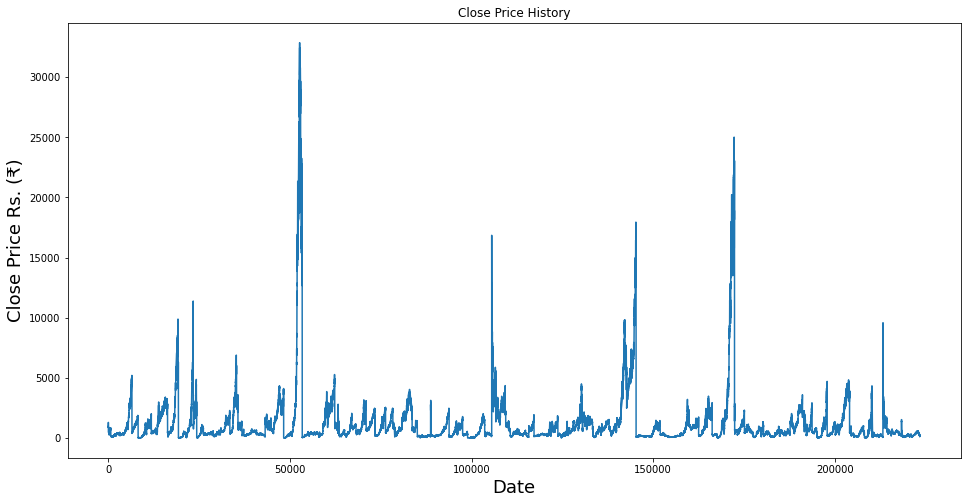

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df2['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price Rs. (₹)',fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close' column
data = df2.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8) 

In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [ ]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

    94/178678 [..............................] - ETA: 2:03:13 - loss: 2.2396e-05

KeyboardInterrupt: ignored